# 10. Neural Network Model

**Name**: Joseph Choi <br>
**Class**: DSC410-T301 Predictive Analytics (2243-1)

## Instructions:
- Using TensorFlow or Scikit-learn, create a neural network model from the dataset from Week 6, with the same target (numerical predictive model)
- Target Variable: "Profit"

## Table of Contents:
- Data Cleaning
- EDA
- Data Preprocessing and Feature Engineering
- Model Training

## Data Cleaning:
**Objective**: 
1. Exploring the dataset to understand what needs to be cleaned
2. Observation/Interpretation from initial data exploration (cleaning)
3. Addressing issues and ensuring that the dataset is ready for EDA

### 1. Exploring the dataset to understand what needs to be cleaned

In [48]:
# setup

import pandas as pd
import numpy as np

In [49]:
# Loading startups_profit dataset and displaying results

startups_profit_dataset = pd.read_csv('startups_profit.csv')
startups_profit_dataset.head(50)

# Observation:
    # "State" column values not standardized
    # "Profit" column values contain "$" and ","
    # Spotted "0" throughout the first three columns. Will need to assess what to do with them

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,"$192,261.83"
1,162597.70,151377.59,443898.53,California,"$191,792.06"
2,153441.51,101145.55,407934.54,FL,"$191,050.39"
3,144372.41,118671.85,383199.62,New York,"$182,901.99"
4,142107.34,91391.77,366168.42,FL,"$166,187.94"
5,131876.90,99814.71,362861.36,New York,"$156,991.12"
6,134615.46,147198.87,127716.82,California,"$156,122.51"
7,130298.13,145530.06,323876.68,FL,"$155,752.60"
8,120542.52,148718.95,311613.29,New York,"$152,211.77"
9,123334.88,108679.17,304981.62,California,"$149,759.96"


In [50]:
# Displaying a summary of the dataset to gain insights into its structure and composition:
    # Checking information on null values per column (no null values)
    # Ensuring each column has the correct data type

startups_profit_dataset.info()

# Observation:
    # Spotted whitespace in "Profit" column
    # "Profit" column has the wrong data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4    Profit          50 non-null     object 
dtypes: float64(3), object(2)
memory usage: 2.1+ KB


In [51]:
# Displaying summary for numerical features:
    # Checking numerical measures like mean, median, and quartiles
    
numerical_summary = startups_profit_dataset.describe()
numerical_summary

,R&D Spend,Administration,Marketing Spend
count,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800
std,45902.256482,28017.802755,122290.310726
min,0.000000,51283.140000,0.000000
25%,39936.370000,103730.875000,129300.132500
50%,73051.080000,122699.795000,212716.240000
75%,101602.800000,144842.180000,299469.085000
max,165349.200000,182645.560000,471784.100000


In [52]:
# Displaying summary for categorical features:
    # Exploring distribution and frequency for each categorical column
    # Identifying potential need for standardization in categorical columns
    # Verifying that only categorical features are present, ensuring exclusion of numerical features
    
categorical_features = startups_profit_dataset.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f"\nDistribution of {feature}:")
    print(startups_profit_dataset[feature].value_counts())
    
# Observation:
    # "Profit" column should not be in this output as it should a float dtype


Distribution of State:
State
New York      17
California    17
FL            16
Name: count, dtype: int64

Distribution of  Profit :
 Profit 
 $192,261.83     1
 $89,949.14      1
 $105,008.31     1
 $103,282.38     1
 $101,004.64     1
 $99,937.59      1
 $97,483.56      1
 $97,427.84      1
 $96,778.92      1
 $96,712.80      1
 $96,479.51      1
 $90,708.19      1
 $81,229.06      1
 $191,792.06     1
 $81,005.76      1
 $78,239.91      1
 $77,798.83      1
 $71,498.49      1
 $69,758.98      1
 $65,200.33      1
 $64,926.08      1
 $49,490.75      1
 $42,559.73      1
 $35,673.41      1
 $105,733.54     1
 $107,404.34     1
 $108,552.04     1
 $108,733.99     1
 $191,050.39     1
 $182,901.99     1
 $166,187.94     1
 $156,991.12     1
 $156,122.51     1
 $155,752.60     1
 $152,211.77     1
 $149,759.96     1
 $146,121.95     1
 $144,259.40     1
 $141,585.52     1
 $134,307.35     1
 $132,602.65     1
 $129,917.04     1
 $126,992.93     1
 $125,370.37     1
 $124,266.90     1
 $

In [53]:
# Displaying null value count per feature:
    # Created to understand null value spread throughout dataset

null_count = startups_profit_dataset.isnull().sum()
null_count

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
 Profit            0
dtype: int64

### 2. Observation/Interpretation from initial data exploration (Cleaning):

From my initial data exploration, I have decided to do the following cleaning steps:
- Standardize the values in the "**State**" column (*New York to NY, California to CA*) for consistency. Goal is to simplify data processing, analysis, and interpretation
- Removing whitespace from "**Profit**" column name for consistency with other column names and for ease of access (coding)
- Remove dollar signs, commas, and whitespaces from "**Profit**" column to convert dtype from object to float 
- Spotted zero values in "**R&D Spend**" and "**Marketing Spend**" columns. 
    - Decided to replace '0' with the mean of the column partitioned by State because I came to the conclusion that the zeros indicate missing data rather than actual zero spending as it is highly unlikely for businesses to have zeros in these expenditure categories. This is just my speculation. 

### 3. Addressing issues and ensuring that the dataset is ready for EDA:

In [54]:
# Creating a copy of dataset to perform cleaning procedures

startups_profit_cleaned = startups_profit_dataset.copy()

In [55]:
# Standardizing the State column (New York to NY & California to CA)
state_mapping = {'New York': 'NY', 'California': 'CA', 'FL': 'FL'}
startups_profit_cleaned['State'] = startups_profit_cleaned['State'].replace(state_mapping)

# Removing whitespaces from column names
startups_profit_cleaned.columns = startups_profit_cleaned.columns.str.strip()

# Removing dollar signs, commas, and whitespace from Profit column to convert column to float
startups_profit_cleaned['Profit'] = startups_profit_cleaned['Profit'].str.replace(' ', '').str.replace(',', '').str.replace('$', '').astype('float64')

# Replacing '0' with the mean of the column partitioned by 'State'
startups_profit_cleaned['R&D Spend'] = startups_profit_cleaned.groupby('State')['R&D Spend'].transform(lambda x: x.replace(0, x.mean()))
startups_profit_cleaned['Marketing Spend'] = startups_profit_cleaned.groupby('State')['Marketing Spend'].transform(lambda x: x.replace(0, x.mean()))

In [56]:
# Printing updated result

startups_profit_cleaned.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,NY,192261.83
1,162597.70,151377.59,443898.53,CA,191792.06
2,153441.51,101145.55,407934.54,FL,191050.39
3,144372.41,118671.85,383199.62,NY,182901.99
4,142107.34,91391.77,366168.42,FL,166187.94
5,131876.90,99814.71,362861.36,NY,156991.12
6,134615.46,147198.87,127716.82,CA,156122.51
7,130298.13,145530.06,323876.68,FL,155752.60
8,120542.52,148718.95,311613.29,NY,152211.77
9,123334.88,108679.17,304981.62,CA,149759.96


In [57]:
# Printing updated summary

startups_profit_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## EDA (Exploratory Data Analysis):
**Objective**: 
1. Build plots to gain insights that will guide the preprocessing and feature engineering process
    - **Univariate**:
        - Histograms (numerical distribution)
        - Bar chart (categorical distribution)
        - Boxplots (outliers)
    - **Bivariate**:
        - Scatterplots (relationship: numerical vs profit)
        - Bar Plot (relationship: categorical vs sum of profit)
2. Observation/Interpretation from the plots

**JC Comment**: Referenced many of my codes from W6 exercise

In [58]:
# Setup

import matplotlib.pyplot as plt

In [59]:
# Creating a copy of dataset to perform EDA

startups_profit_eda = startups_profit_cleaned.copy()

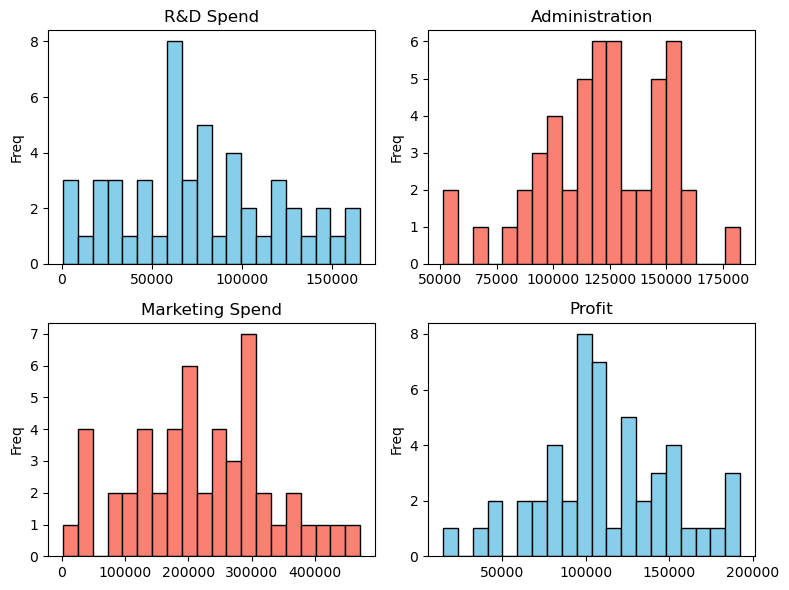

In [60]:
# Histograms:

# Subplots for 'R&D Spend', 'Administration', 'Marketing Spend', and 'Profit' columns
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# 'R&D Spend' Distribution:
axes[0, 0].hist(startups_profit_eda['R&D Spend'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('R&D Spend')
axes[0, 0].set_ylabel('Freq')

# 'Administration' Distribution:
axes[0, 1].hist(startups_profit_eda['Administration'], bins=20, color='salmon', edgecolor='black')
axes[0, 1].set_title('Administration')
axes[0, 1].set_ylabel('Freq')

# 'Marketing Spend' Distribution:
axes[1, 0].hist(startups_profit_eda['Marketing Spend'], bins=20, color='salmon', edgecolor='black')
axes[1, 0].set_title('Marketing Spend')
axes[1, 0].set_ylabel('Freq')

# 'Profit' Distribution:
axes[1, 1].hist(startups_profit_eda['Profit'], bins=20, color='skyblue', edgecolor='black')
axes[1, 1].set_title('Profit')
axes[1, 1].set_ylabel('Freq')

# Printing the visualizations
plt.tight_layout()
plt.show()

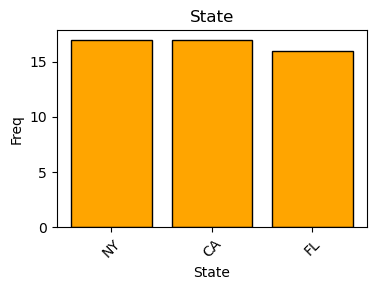

In [61]:
# Bar Chart:

# Visualization setup
plt.figure(figsize=(4, 3))
state_counts = startups_profit_eda['State'].value_counts()
plt.bar(state_counts.index, state_counts, color='orange', edgecolor='black')
plt.title('State')
plt.xlabel('State')
plt.ylabel('Freq')
plt.xticks(rotation=45)

# Printing the visualization
plt.tight_layout()
plt.show()

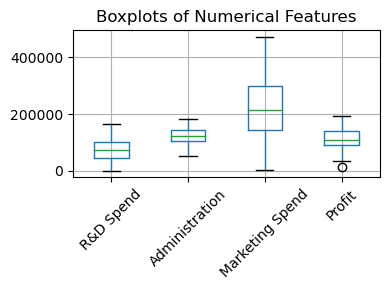

In [62]:
# Boxplots: 

# Selecting only the numerical columns
numerical_columns = startups_profit_eda.select_dtypes(include=['float64', 'int64'])

# Visualization setup
plt.figure(figsize=(4, 3))
numerical_columns.boxplot()
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)

# Printing visualizations
plt.tight_layout()  
plt.show()

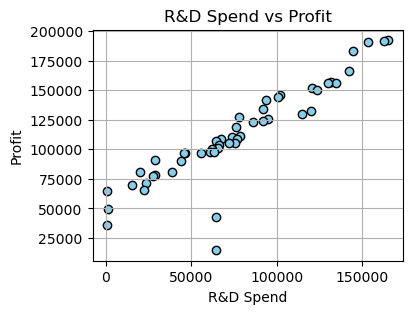

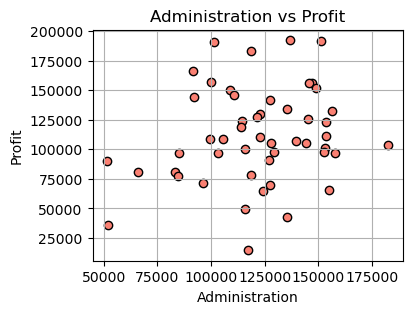

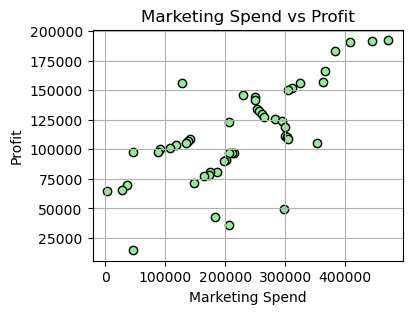

In [63]:
# Scatter plots: 

# 'R&D Spend' vs 'Profit'
plt.figure(figsize=(4, 3))
plt.scatter(startups_profit_eda['R&D Spend'], startups_profit_eda['Profit'], color='skyblue', edgecolor='black')
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# 'Administration' vs 'Profit'
plt.figure(figsize=(4, 3))
plt.scatter(startups_profit_eda['Administration'], startups_profit_eda['Profit'], color='salmon', edgecolor='black')
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# 'Marketing Spend' vs 'Profit'
plt.figure(figsize=(4, 3))
plt.scatter(startups_profit_eda['Marketing Spend'], startups_profit_eda['Profit'], color='lightgreen', edgecolor='black')
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

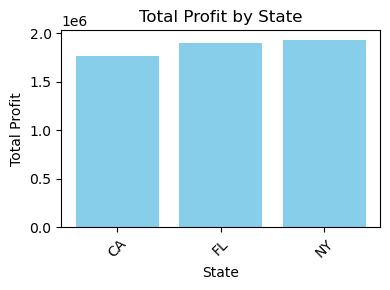

In [64]:
# Bar plot (relationship: categorical vs sum of profit): 

# Calculating the sum of profit by state
sum_profit_by_state = startups_profit_eda.groupby('State')['Profit'].sum().reset_index()

# Visualization setup
plt.figure(figsize=(4, 3))
plt.bar(sum_profit_by_state['State'], sum_profit_by_state['Profit'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.title('Total Profit by State')
plt.xticks(rotation=45)

# Printing the visualization
plt.tight_layout()
plt.show()

### 2. Observations/Interpretation from the plots:
#### Histograms:
- Tall bars are concentrated in the middle of the distribution, with shorter bars dispersed to the left and right
- Shows a bell-shaped curve, indicating a relatively even distribution of data

#### Bar Chart:
- Bar heights across different states appear relatively even, indicating a balanced distribution of the data

#### Box Plots:
- Profit box plot shows a dot below the bottom whisker, indicating potential outliers in the lower profit range

#### Scatter Plots:
- If trendline is graphed, a line with a positive slope would be plotted for all plots
- A positive trendline equates to positive relationship
- Positive relationship between all numerical features and the target variable "Profit" suggests that higher values in the numerical features correspond to higher profit values
- Overall, suggests a strong correlation with profit

#### Bar Plot (relationship: categorical vs avg. "Profit"):
- Bar heights are relatively even, indicating a consistent distribution of profit among the states without significant variationsrelationship: categorical vs sum of profit)

#### My Thought Process:
From my EDA process, I have decided to do the following preprocessing and feature engineering steps:
- Not remove outliers as they represent genuine data points. I verified the profit column and found no zeros. Due to the dataset's small size, I intend to keep all rows for model training.
- Encode the state feature into numerical format before feeding it into the neural network model
- I have decided to apply feature scaling to my input numerical features to ensure that all input have similar scaling via Standardization. Why?
    - Make sure each feature contributes equally during model training
    - For better performance as scaling would ideally make the neural network model less sensitive to the initial weights and learning rate choices

## Data Preprocessing and Feature Engineering:
- Preprocessing data and applying feature engineering to make it suitable for modeling
- **Objective**:
    1. Manual encoding state column
    2. Feature scaling numerical feature inputs via Standardization

In [65]:
# Setup

from sklearn.preprocessing import StandardScaler

In [66]:
# Creating a copy of dataset for data processing and feature engineering steps

startups_profit_fe = startups_profit_eda.copy()

### 1. Manual encoding state column

In [67]:
# Defining mappings
state_mapping = {'CA': 1, 'FL': 2, 'NY': 3}

# Applying mapping to the df
startups_profit_fe['State Encoded'] = startups_profit_fe['State'].map(state_mapping)

# Removing duplicate columns
startups_profit_fe.drop(columns=['State'], inplace=True)

### 2. Feature scaling numerical feature inputs via Standardization

In [68]:
# Selecting the numerical features for scaling
scaling_features = ['R&D Spend', 'Administration', 'Marketing Spend']

# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting and transforming the selected numerical features
startups_profit_fe[scaling_features] = scaler.fit_transform(startups_profit_fe[scaling_features])

In [69]:
# Before:

startups_profit_eda.head(10).T

,0,1,2,3,4,5,6,7,8,9
R&D Spend,165349.2,162597.7,153441.51,144372.41,142107.34,131876.9,134615.46,130298.13,120542.52,123334.88
Administration,136897.8,151377.59,101145.55,118671.85,91391.77,99814.71,147198.87,145530.06,148718.95,108679.17
Marketing Spend,471784.1,443898.53,407934.54,383199.62,366168.42,362861.36,127716.82,323876.68,311613.29,304981.62
State,NY,CA,FL,NY,FL,NY,CA,FL,NY,CA
Profit,192261.83,191792.06,191050.39,182901.99,166187.94,156991.12,156122.51,155752.6,152211.77,149759.96


In [70]:
# After: 

startups_profit_fe.head(10).T

,0,1,2,3,4,5,6,7,8,9
R&D Spend,2.073488,2.009415,1.796196,1.585006,1.532259,1.294025,1.357797,1.257260,1.030083,1.095108
Administration,0.560753,1.082807,-0.728257,-0.096365,-1.079919,-0.776239,0.932147,0.871980,0.986952,-0.456640
Marketing Spend,2.285390,2.029340,1.699113,1.471992,1.315609,1.285243,-0.873894,0.927279,0.814675,0.753781
Profit,192261.830000,191792.060000,191050.390000,182901.990000,166187.940000,156991.120000,156122.510000,155752.600000,152211.770000,149759.960000
State Encoded,3.000000,1.000000,2.000000,3.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000


## Model Training:
- Create a neural network model
- Referencing textbook Hands-On Predictive Analytics's code (pg. 200-205)

#### Code Breakdown
##### Setting 'X' as input and 'y' as target:
- Separateing dataset into the features (inputs) and the target variable (output)
##### Splitting the dataset into training and testing sets:
- Dividing data into two sets: one for training the model and the other for testing the model's performance
##### Defining the neural network model:
- Defining the structure of the neural network model
- Specifying the number of layers, the number of neurons in each layer, and the activation functions used for the model
##### Compiling the model:
- Specifying the loss function and optimizer to be used during training
- Important as it instructs on how the model will measure its performance and how it will update its weights based on that performance
##### Training the model:
- Training the neural network model on the training data
##### Evaluation the model:
- Evaluating the performance of the trained model on both the training and testing datasets
- Providing insights into how well the model is performing and whether it's overfitting or underfitting the data

In [79]:
# Creating a copy of dataset for model training steps

startups_profit_mt = startups_profit_fe.copy()

In [41]:
# Setup

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2024-02-17 06:26:56.358503: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-17 06:26:59.543399: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-17 06:26:59.560282: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-17 06:27:10.864920: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [80]:
# Setting 'X' as input and 'y' as target
X = startups_profit_mt.drop(columns=['Profit'])
y = startups_profit_mt['Profit']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Defining the neural network model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation=None))

# Modeled the specifications of my three hidden layers and output layer from the textbook

In [82]:
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Modeled the specifications of the loss function and optimizer to be used from the textbook

In [83]:
# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

# Modeled the specifications of the epochs (complete pass through), batch size (no. of samples), and verbose (parameter) to be used from the textbook

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 15096878080.0000
Epoch 2/50
1/1 [==============================] - 0s 14ms/step - loss: 15096872960.0000
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 15096866816.0000
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 15096861696.0000
Epoch 5/50
1/1 [==============================] - 0s 16ms/step - loss: 15096856576.0000
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 15096850432.0000
Epoch 7/50
1/1 [==============================] - 0s 16ms/step - loss: 15096845312.0000
Epoch 8/50
1/1 [==============================] - 0s 14ms/step - loss: 15096840192.0000
Epoch 9/50
1/1 [==============================] - 0s 21ms/step - loss: 15096834048.0000
Epoch 10/50
1/1 [==============================] - 0s 19ms/step - loss: 15096829952.0000
Epoch 11/50
1/1 [==============================] - 0s 26ms/step - loss: 15096825856.0000
Epoch 12/50
1/1 [===============

In [84]:
# Evaluating the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)

print("Train MSE: {:.3f}".format(train_mse))
print("Test MSE: {:.3f}".format(test_mse))

Train MSE: 15096752128.000
Test MSE: 10307504128.000
